# STOR 320: Introduction to Data Science
## EDA Group PLACE_GROUP_NUMBER_HERE (Ex: EDA Group 12)

## Part 1: Data cleaning, merging, and visualization (6 points)

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
eviction = pd.read_csv('eviction_2020_2024.csv')
eviction.head()

,city,type,GEOID,racial_majority,month,filings_2020,filings_avg,last_updated,xcourtcofips
0,"Albuquerque, NM",Census Tract,35001000107,White,01/2020,8,5.333333,2024-08-10,NaN
1,"Albuquerque, NM",Census Tract,35001000107,White,02/2020,14,9.000000,2024-08-10,NaN
2,"Albuquerque, NM",Census Tract,35001000107,White,03/2020,10,5.666667,2024-08-10,NaN
3,"Albuquerque, NM",Census Tract,35001000107,White,04/2020,5,8.333333,2024-08-10,NaN
4,"Albuquerque, NM",Census Tract,35001000107,White,05/2020,0,6.666667,2024-08-10,NaN


In [125]:
PIT_2023 = pd.read_excel('PITCOC.xlsb', engine='pyxlsb', sheet_name="2023")
PIT_2023.head()

,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,315.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,144.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,180.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,120.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,23.0,...,4.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0


In [126]:
eviction.head()

,city,type,GEOID,racial_majority,month,filings_2020,filings_avg,last_updated,xcourtcofips
0,"Albuquerque, NM",Census Tract,35001000107,White,01/2020,8,5.333333,2024-08-10,NaN
1,"Albuquerque, NM",Census Tract,35001000107,White,02/2020,14,9.000000,2024-08-10,NaN
2,"Albuquerque, NM",Census Tract,35001000107,White,03/2020,10,5.666667,2024-08-10,NaN
3,"Albuquerque, NM",Census Tract,35001000107,White,04/2020,5,8.333333,2024-08-10,NaN
4,"Albuquerque, NM",Census Tract,35001000107,White,05/2020,0,6.666667,2024-08-10,NaN


In [127]:
## column names check (1 point)

In [128]:
eviction.columns

Index(['city', 'type', 'GEOID', 'racial_majority', 'month', 'filings_2020',
       'filings_avg', 'last_updated', 'xcourtcofips'],
      dtype='object')

In [129]:
# remove GEOID, last_updated, and xcourtcofips because they're not useful for merging or relevant
eviction = eviction.drop(["GEOID", "last_updated", "xcourtcofips"], axis=1)
eviction.columns

Index(['city', 'type', 'racial_majority', 'month', 'filings_2020',
       'filings_avg'],
      dtype='object')

In [130]:
len(PIT_2023.columns) # len because there's a lot

645

In [131]:
new_cols = PIT_2023.columns[0:25] # columns after 25 talk about sheltered and unsheltered
PIT_sliced = PIT_2023[new_cols][0:386] # truncating rows
PIT_sliced = PIT_sliced.drop("Count Types", axis=1)
PIT_sliced.head()

,CoC Number,CoC Name,CoC Category,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,...,Overall Homeless - Gender that is not Singularly Female or Male,Overall Homeless - Gender Questioning,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,AK-500,Anchorage CoC,Other Largely Urban CoC,1760.0,185.0,161.0,377.0,419.0,315.0,223.0,...,3.0,2.0,1638.0,122.0,480.0,156.0,28.0,755.0,83.0,258.0
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,854.0,176.0,66.0,124.0,190.0,144.0,123.0,...,2.0,0.0,717.0,137.0,316.0,25.0,10.0,396.0,16.0,91.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,847.0,67.0,42.0,127.0,182.0,180.0,187.0,...,1.0,0.0,822.0,25.0,295.0,518.0,1.0,14.0,2.0,17.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,670.0,110.0,19.0,78.0,156.0,120.0,140.0,...,2.0,0.0,655.0,15.0,281.0,351.0,2.0,11.0,6.0,19.0
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,195.0,63.0,9.0,42.0,36.0,23.0,16.0,...,0.0,0.0,186.0,9.0,130.0,48.0,0.0,2.0,0.0,15.0


In [132]:
## missing data check (1 point)

In [133]:
eviction_cols = eviction.columns
for col in eviction_cols:
    slice = eviction[str(col)]
    if slice.hasnans:
        print(f"{str(col)} " + f"({len(slice.unique())})" + ": " + str(slice.unique()))

racial_majority (5): ['White' 'Other' 'Latinx' nan 'Black']
filings_avg (2775): [ 5.33333333  9.          5.66666667 ... 79.25       59.75
 69.25      ]


In [134]:
# we can drop filings_avg since we are calculating the average for the year later
# we can drop racial_majority since we can supplement it with census data if need be
eviction = eviction.drop(["filings_avg", "racial_majority"], axis=1)
eviction

,city,type,month,filings_2020
0,"Albuquerque, NM",Census Tract,01/2020,8
1,"Albuquerque, NM",Census Tract,02/2020,14
2,"Albuquerque, NM",Census Tract,03/2020,10
3,"Albuquerque, NM",Census Tract,04/2020,5
4,"Albuquerque, NM",Census Tract,05/2020,0
...,...,...,...,...
598451,"Wilmington, DE",Census Tract,04/2024,1
598452,"Wilmington, DE",Census Tract,05/2024,9
598453,"Wilmington, DE",Census Tract,06/2024,3
598454,"Wilmington, DE",Census Tract,07/2024,5


In [135]:
# replacing NaN with zero because values are not categorical
PIT_sliced = PIT_sliced.fillna(0)
PIT_sliced.head()

,CoC Number,CoC Name,CoC Category,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,...,Overall Homeless - Gender that is not Singularly Female or Male,Overall Homeless - Gender Questioning,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,AK-500,Anchorage CoC,Other Largely Urban CoC,1760.0,185.0,161.0,377.0,419.0,315.0,223.0,...,3.0,2.0,1638.0,122.0,480.0,156.0,28.0,755.0,83.0,258.0
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,854.0,176.0,66.0,124.0,190.0,144.0,123.0,...,2.0,0.0,717.0,137.0,316.0,25.0,10.0,396.0,16.0,91.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,847.0,67.0,42.0,127.0,182.0,180.0,187.0,...,1.0,0.0,822.0,25.0,295.0,518.0,1.0,14.0,2.0,17.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,670.0,110.0,19.0,78.0,156.0,120.0,140.0,...,2.0,0.0,655.0,15.0,281.0,351.0,2.0,11.0,6.0,19.0
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,195.0,63.0,9.0,42.0,36.0,23.0,16.0,...,0.0,0.0,186.0,9.0,130.0,48.0,0.0,2.0,0.0,15.0


In [136]:
## Outlier check (1 point)

In [137]:
PIT_sliced.describe()

,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,Overall Homeless - Over 64,Overall Homeless - Female,Overall Homeless - Male,...,Overall Homeless - Gender that is not Singularly Female or Male,Overall Homeless - Gender Questioning,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,3383.958549,578.341969,245.782383,575.139896,618.119171,504.088083,469.958549,191.735751,1295.383420,2047.461140,...,16.005181,3.932642,2454.756477,929.202073,1683.181347,1262.300518,59.968912,119.772021,55.502591,203.233161
std,33685.071349,5823.125602,2462.595873,5768.223300,6160.189569,5011.779805,4672.930049,1905.210525,12896.424039,20384.594635,...,160.203799,39.295757,24261.167747,9548.451413,16621.001323,12835.350265,622.043861,1188.048176,561.061296,2022.758577
min,55.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,23.000000,...,0.000000,0.000000,17.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,337.000000,53.000000,21.000000,52.250000,60.000000,48.000000,41.250000,16.000000,134.250000,190.500000,...,0.000000,0.000000,292.000000,23.250000,156.750000,70.000000,1.000000,2.000000,0.000000,13.000000
50%,656.500000,109.500000,44.000000,107.000000,120.500000,99.500000,89.500000,36.000000,255.000000,389.000000,...,2.000000,0.000000,565.500000,68.000000,344.000000,177.500000,4.000000,10.000000,2.000000,28.000000
75%,1549.250000,226.750000,102.000000,244.500000,285.500000,233.000000,216.750000,88.500000,569.500000,890.500000,...,6.000000,1.000000,1197.000000,221.750000,821.000000,436.000000,11.000000,35.750000,9.000000,75.750000
max,653104.000000,111620.000000,47436.000000,111002.000000,119297.000000,97289.000000,90702.000000,37005.000000,250009.000000,395160.000000,...,3089.000000,759.000000,473768.000000,179336.000000,324854.000000,243624.000000,11574.000000,23116.000000,10712.000000,39224.000000


In [138]:
# the max seems quite high for overall homeless
max = PIT_sliced["Overall Homeless"].idxmax()
PIT_sliced.loc[[max]]


,CoC Number,CoC Name,CoC Category,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,...,Overall Homeless - Gender that is not Singularly Female or Male,Overall Homeless - Gender Questioning,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
385,0,Total,0,653104.0,111620.0,47436.0,111002.0,119297.0,97289.0,90702.0,...,3089.0,759.0,473768.0,179336.0,324854.0,243624.0,11574.0,23116.0,10712.0,39224.0


In [139]:
# these are totals, so it's okay to remove
PIT_sliced = PIT_sliced.drop(max)
PIT_sliced.describe()

,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,Overall Homeless - Over 64,Overall Homeless - Female,Overall Homeless - Male,...,Overall Homeless - Gender that is not Singularly Female or Male,Overall Homeless - Gender Questioning,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
count,385.000000,385.000000,385.00000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,...,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1696.374026,289.922078,123.21039,288.316883,309.862338,252.698701,235.589610,96.116883,649.374026,1026.389610,...,8.023377,1.971429,1230.566234,465.807792,843.776623,632.789610,30.062338,60.041558,27.823377,101.880519
std,5955.731326,1343.006959,515.60255,1233.336451,1128.114723,852.013239,797.125492,317.653276,2289.696403,3623.145956,...,32.806995,7.721164,3186.678681,2882.200067,2071.985499,3436.753939,204.468891,185.485240,138.238208,356.021559
min,55.000000,1.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,23.000000,...,0.000000,0.000000,17.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,337.000000,53.000000,21.00000,52.000000,60.000000,48.000000,41.000000,16.000000,134.000000,190.000000,...,0.000000,0.000000,292.000000,23.000000,156.000000,70.000000,1.000000,2.000000,0.000000,13.000000
50%,653.000000,109.000000,44.00000,107.000000,120.000000,99.000000,89.000000,36.000000,254.000000,389.000000,...,2.000000,0.000000,565.000000,68.000000,342.000000,174.000000,4.000000,10.000000,2.000000,28.000000
75%,1532.000000,226.000000,102.00000,240.000000,284.000000,230.000000,216.000000,87.000000,568.000000,880.000000,...,6.000000,1.000000,1194.000000,221.000000,809.000000,436.000000,11.000000,35.000000,9.000000,75.000000
max,88025.000000,25200.000000,9130.00000,19577.000000,16597.000000,13475.000000,12841.000000,4721.000000,37788.000000,49650.000000,...,570.000000,110.000000,41029.000000,46996.000000,28624.000000,59292.000000,3773.000000,2700.000000,1683.000000,4888.000000


In [140]:
eviction.describe()


,filings_2020
count,598456.000000
mean,4.744833
std,86.956711
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,14556.000000


In [141]:
max = eviction["filings_2020"].idxmax()
eviction.loc[[max]] # this makes sense, no need to remove

,city,type,month,filings_2020
460830,"New York, NY",Zip Code,01/2020,14556


In [142]:
## data merging (1 point)

In [143]:
# remove data from eviction that is not from 2023
eviction_2023 = eviction[eviction['month'].str.contains('2023')]
eviction_2023["month"].unique()

array(['01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023',
       '07/2023', '08/2023', '09/2023', '10/2023', '11/2023', '12/2023'],
      dtype=object)

In [144]:
eviction_city = eviction_2023.groupby("city").mean(numeric_only=True)
eviction_city = eviction_city.reset_index()
eviction_city['state'] = eviction_city['city'].str[-2:] 
eviction_city["state"][10] = "FL" # ft. lauderdale was mislabeled
eviction_city["state"][20] = "FL" # miami was mislabeled
eviction_city["state"][26] = "FL" # palm beach was mislabeled
eviction_city

/var/folders/nw/5zcrqdxs7c57b12ptv8284p80000gn/T/ipykernel_74987/372597069.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nw/5zcrqdxs7c57b12ptv8284p80000gn/T/ipykernel_74987/372597069.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nw/5zcrqdxs7c57b12ptv8284p80000gn/T/ipykernel_74987/372597069.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,filings_2020,state
0,"Albuquerque, NM",4.560734,NM
1,"Austin, TX",8.560688,TX
2,"Boston, MA",2.673019,MA
3,"Bridgeport, CT",1.642178,CT
4,"Charleston, SC",8.527500,SC
5,"Cincinnati, OH",4.695301,OH
6,"Cleveland, OH",3.372671,OH
7,"Columbus, OH",6.018744,OH
8,"Dallas, TX",4.892802,TX
9,"Fort Worth, TX",5.956454,TX


In [145]:
PIT_sliced_state = PIT_sliced[PIT_sliced['CoC Name'].str.contains('State')]
PIT_sliced_state['state'] = PIT_sliced_state['CoC Number'].str[0:2] 
PIT_sliced_state.head()

/var/folders/nw/5zcrqdxs7c57b12ptv8284p80000gn/T/ipykernel_74987/2207987685.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CoC Number,CoC Name,CoC Category,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,...,Overall Homeless - Gender Questioning,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,state
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,854.0,176.0,66.0,124.0,190.0,144.0,123.0,...,0.0,717.0,137.0,316.0,25.0,10.0,396.0,16.0,91.0,AK
9,AL-507,Alabama Balance of State CoC,Largely Rural CoC,283.0,77.0,25.0,53.0,60.0,38.0,13.0,...,4.0,258.0,25.0,91.0,170.0,0.0,1.0,0.0,21.0,AL
12,AR-503,Arkansas Balance of State CoC,Largely Rural CoC,871.0,91.0,66.0,161.0,196.0,190.0,133.0,...,3.0,832.0,39.0,619.0,233.0,2.0,3.0,5.0,9.0,AR
15,AZ-500,Arizona Balance of State CoC,Largely Rural CoC,2386.0,295.0,117.0,317.0,447.0,473.0,457.0,...,5.0,1798.0,588.0,1662.0,142.0,14.0,266.0,16.0,286.0,AZ
62,CO-500,Colorado Balance of State CoC,Largely Rural CoC,2201.0,203.0,120.0,394.0,495.0,460.0,380.0,...,2.0,1577.0,624.0,1660.0,90.0,8.0,217.0,10.0,216.0,CO


In [146]:
merge = pd.merge(PIT_sliced_state, eviction_city, on = "state")
merge.head()

,CoC Number,CoC Name,CoC Category,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,...,Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,state,city,filings_2020
0,AZ-500,Arizona Balance of State CoC,Largely Rural CoC,2386.0,295.0,117.0,317.0,447.0,473.0,457.0,...,588.0,1662.0,142.0,14.0,266.0,16.0,286.0,AZ,"Phoenix, AZ",35.612973
1,CT-505,Connecticut Balance of State CoC,Largely Suburban CoC,2418.0,454.0,190.0,378.0,430.0,393.0,431.0,...,730.0,1381.0,832.0,12.0,33.0,6.0,154.0,CT,"Bridgeport, CT",1.642178
2,CT-505,Connecticut Balance of State CoC,Largely Suburban CoC,2418.0,454.0,190.0,378.0,430.0,393.0,431.0,...,730.0,1381.0,832.0,12.0,33.0,6.0,154.0,CT,"Hartford, CT",2.340749
3,DE-500,Delaware Statewide CoC,Largely Suburban CoC,1245.0,335.0,66.0,195.0,189.0,193.0,211.0,...,107.0,385.0,773.0,4.0,3.0,2.0,78.0,DE,"Wilmington, DE",4.833904
4,IN-502,Indiana Balance of State CoC,Largely Rural CoC,4398.0,923.0,238.0,709.0,848.0,789.0,704.0,...,221.0,3018.0,1113.0,19.0,20.0,30.0,198.0,IN,"Indianapolis, IN",8.988517


In [147]:
## data transformation, normalization, and cleaning (1 point)

In [148]:
# sets up data for corrplots and purely quantitative analysis
merge_numeric = merge.select_dtypes(include=[np.number])

In [149]:
## Exploratory data visualization (1 point)

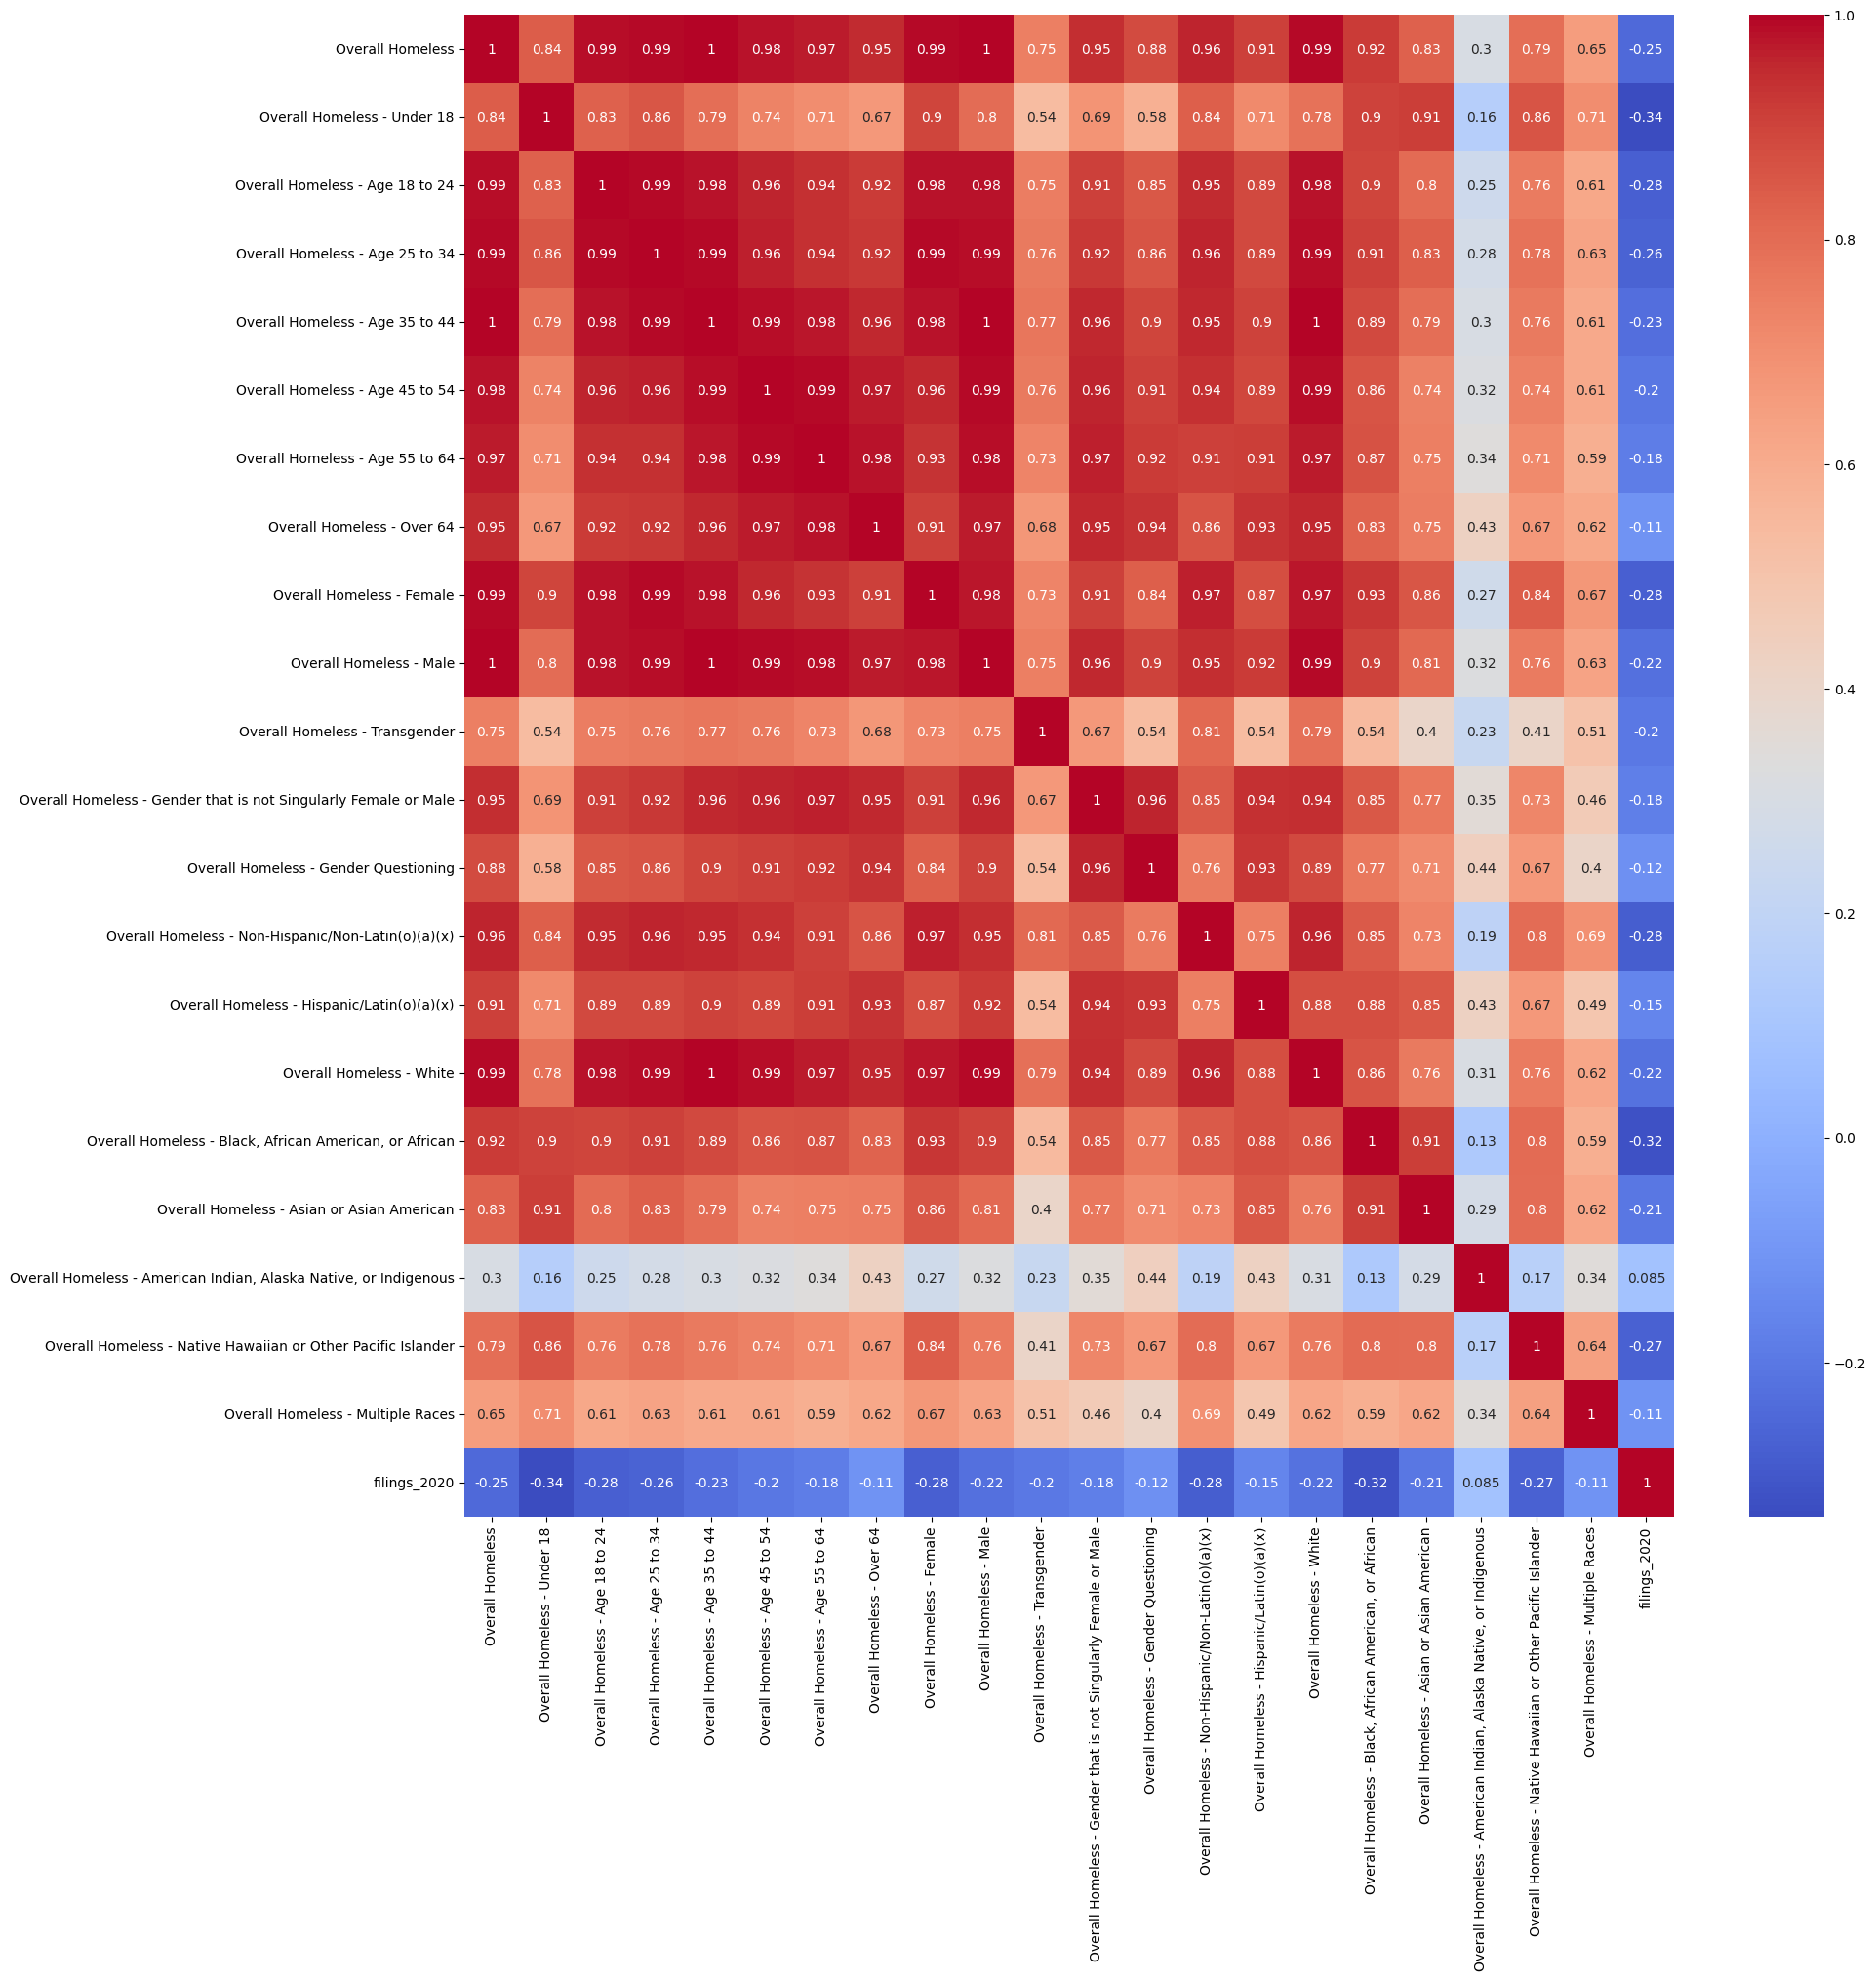

In [150]:
plt.figure(figsize=(20,20))
sns.heatmap(data=merge_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

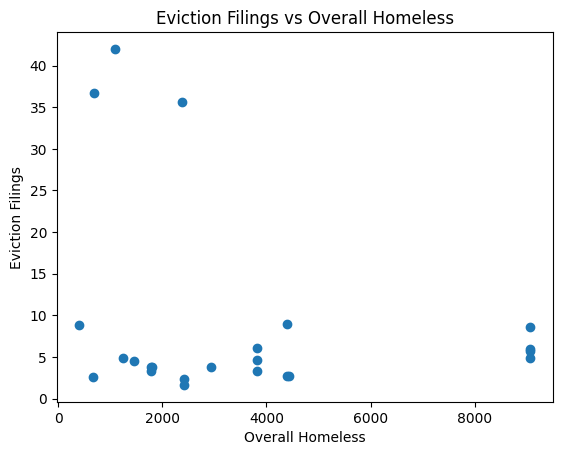

In [151]:
import matplotlib.pyplot as plt
plt.scatter(x=merge["Overall Homeless"], y=merge["filings_2020"])
plt.ylabel("Eviction Filings")
plt.xlabel("Overall Homeless")
plt.title("Eviction Filings vs Overall Homeless")
plt.show()

High multicollinearity & low n, unfit for regression or advanced models.

## Part 2: Answer questions from the proposals (8 points)

Each plot should be followed by a paragraph of explanation and observation.

### Creator: Ivy Nangalia

#### Question: What demographics of people are more likely to be homeless today?

In [152]:
means = PIT_sliced.describe()[1:2]
race_cols = means.columns[15:22]
total_sum = means[race_cols].sum(axis=1)
race_percent = means[race_cols].div(total_sum, axis=0) 
race_percent.reset_index()

,index,Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,mean,0.4974,0.373025,0.017722,0.035394,0.016402,0.060058


In [153]:
# renaming columns
race_percent = race_percent.rename(columns={'Overall Homeless - White': 'White', 
                                            'Overall Homeless - Black, African American, or African': 'Black, African American, or African', 
                                            'Overall Homeless - Asian or Asian American': 'Asian or Asian American', 
                                            'Overall Homeless - American Indian, Alaska Native, or Indigenous': 'American Indian, Alaska Native, or Indigenous', 
                                            'Overall Homeless - Native Hawaiian or Other Pacific Islander': 'Native Hawaiian or Other Pacific Islander', 
                                            'Overall Homeless - Multiple Races': 'Multiple Races'})


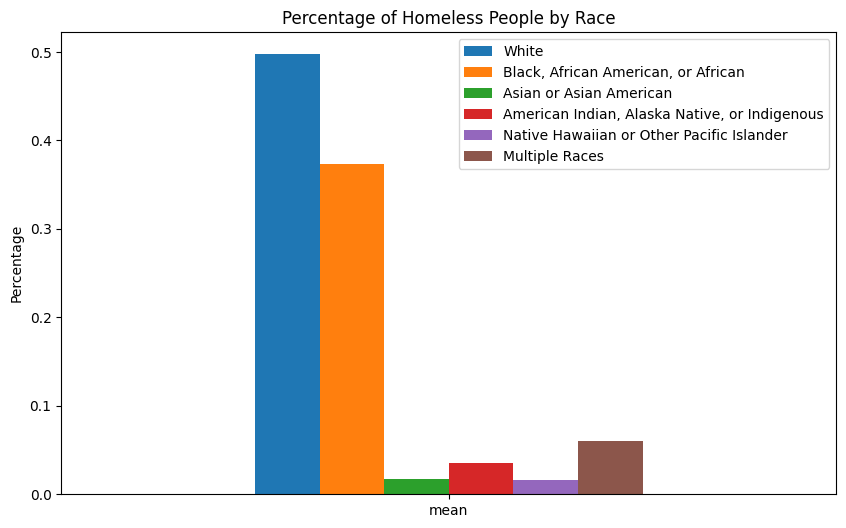

In [154]:
race_percent.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Percentage')
plt.title('Percentage of Homeless People by Race')
plt.xticks(rotation=0) 
plt.show()


#### Answer:
It seems that White people have the highest percentage of the homeless population (49.7%) followed closely by Black people (37.3%). White people making up the largest share of the homeless population makes sense since the majority of the American population is White. However, only 13.7% of the population is Black, which implies some disproportionate factors affecting Black people and their housing security. This makes sense considering the long history of racism and racist policies enacted in the United States. Moreover, I'd argue that White people are less likely to be homeless considering that they make up 75.3% of the population but only 49.7% of the homeless population, implying some systemic factors that improve the housing security of White people as compared to others. 

Note: the population data is from the US Census.

### Interpreter 2: Ximing Sun

#### Question: What trends do we see in racial segregation?

#### Answer:

In [155]:
racial = merge.iloc[:, 16:26]
racial

,Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Overall Homeless - Hispanic/Latin(o)(a)(x),Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,state,city
0,1798.0,588.0,1662.0,142.0,14.0,266.0,16.0,286.0,AZ,"Phoenix, AZ"
1,1688.0,730.0,1381.0,832.0,12.0,33.0,6.0,154.0,CT,"Bridgeport, CT"
2,1688.0,730.0,1381.0,832.0,12.0,33.0,6.0,154.0,CT,"Hartford, CT"
3,1138.0,107.0,385.0,773.0,4.0,3.0,2.0,78.0,DE,"Wilmington, DE"
4,4177.0,221.0,3018.0,1113.0,19.0,20.0,30.0,198.0,IN,"Indianapolis, IN"
5,4177.0,221.0,3018.0,1113.0,19.0,20.0,30.0,198.0,IN,"South Bend, IN"
6,662.0,16.0,273.0,385.0,1.0,4.0,1.0,14.0,LA,"New Orleans, LA"
7,2906.0,1526.0,2153.0,1917.0,78.0,19.0,40.0,225.0,MA,"Boston, MA"
8,1725.0,67.0,1347.0,328.0,5.0,14.0,23.0,75.0,MO,"Kansas City, MO"
9,1725.0,67.0,1347.0,328.0,5.0,14.0,23.0,75.0,MO,"St Louis, MO"


In [156]:
## Add more cells if your group has more than two interpreters

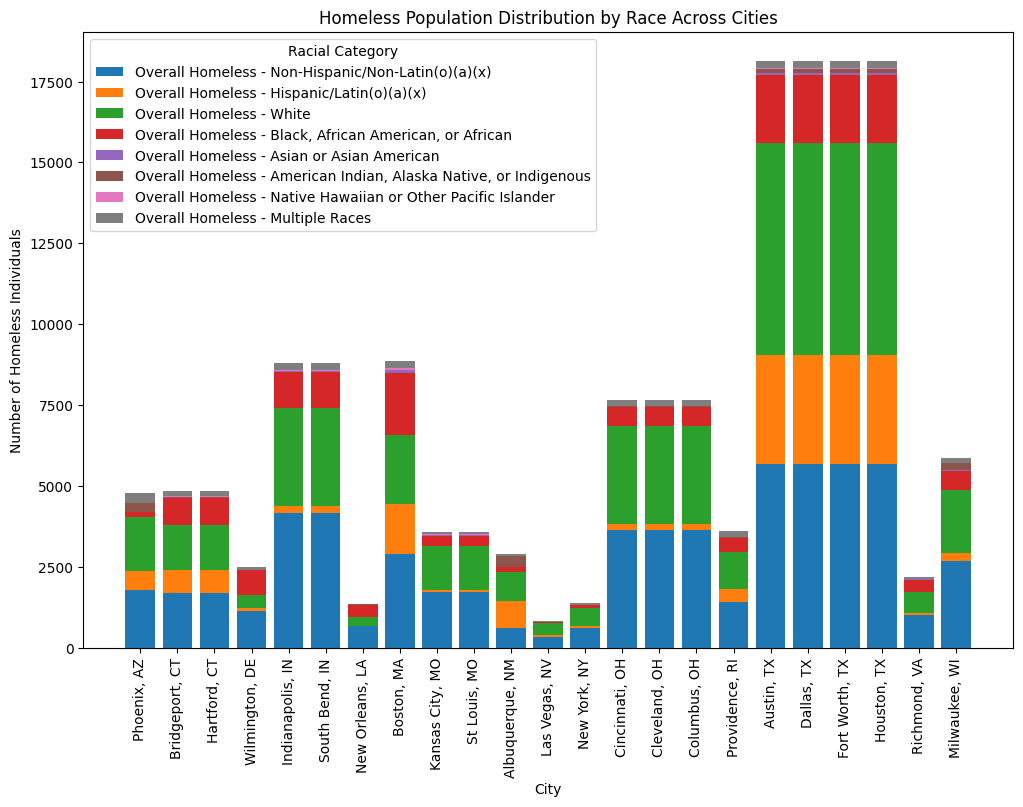

In [157]:
racial_categories = [
    'Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)',
    'Overall Homeless - Hispanic/Latin(o)(a)(x)',
    'Overall Homeless - White',
    'Overall Homeless - Black, African American, or African',
    'Overall Homeless - Asian or Asian American',
    'Overall Homeless - American Indian, Alaska Native, or Indigenous',
    'Overall Homeless - Native Hawaiian or Other Pacific Islander',
    'Overall Homeless - Multiple Races'
]

fig, ax = plt.subplots(figsize=(12, 8))
for category in racial_categories:
    ax.bar(racial['city'], racial[category], label=category, bottom=racial[racial_categories].cumsum(axis=1)[category] - racial[category])

ax.set_xlabel("City")
ax.set_ylabel("Number of Homeless Individuals")
ax.set_title("Homeless Population Distribution by Race Across Cities")
ax.legend(title="Racial Category")
plt.xticks(rotation=90)

plt.show()

In [158]:
PIT_sliced["state"] = PIT_sliced["CoC Number"].apply(lambda x: x[:2])

acial_categories = [
    'Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)',
    'Overall Homeless - Hispanic/Latin(o)(a)(x)',
    'Overall Homeless - White',
    'Overall Homeless - Black, African American, or African',
    'Overall Homeless - Asian or Asian American',
    'Overall Homeless - American Indian, Alaska Native, or Indigenous',
    'Overall Homeless - Native Hawaiian or Other Pacific Islander',
    'Overall Homeless - Multiple Races',
    "state"
]


race_country = PIT_sliced.iloc[:, 16:26]
race_country_state = race_country.groupby("state").mean()

#state validation:
states = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC",
          "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN", "KS", 
          "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", 
          "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", 
          "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"]
for state in race_country_state.index:
    if state not in states:
        race_country_state.drop(state, inplace=True)
#race_country_state
# GU , DC

In [159]:
len(race_country_state)
race_country_state["total"] = race_country_state.sum(axis=1)

race_country_state_pct = race_country_state.drop("total", axis=1).div(race_country_state["total"], axis=0) * 100

hisp_pct = pd.DataFrame(race_country_state_pct.iloc[:, 1])
hisp_pct
#race_country_state_pct

,Overall Homeless - Hispanic/Latin(o)(a)(x)
state,
AK,4.954093
AL,1.755448
AR,2.587198
AZ,13.788017
CA,18.454071
CO,13.047995
CT,15.456053
DC,4.906542
DE,4.297189


In [160]:
# create a heatmap of the Overall Homeless - Hispanic/Latin(o)(a)(x) by state on a map
import plotly.express as px

# Create a dictionary mapping state abbreviations to full names
state_names = {
    "AK": "Alaska", "AL": "Alabama", "AR": "Arkansas", "AZ": "Arizona", 
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DC": "District of Columbia",
    "DE": "Delaware", "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", 
    "IA": "Iowa", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "MA": "Massachusetts",
    "MD": "Maryland", "ME": "Maine", "MI": "Michigan", "MN": "Minnesota", 
    "MO": "Missouri", "MS": "Mississippi", "MT": "Montana", "NC": "North Carolina",
    "ND": "North Dakota", "NE": "Nebraska", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NV": "Nevada", "NY": "New York", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
    "UT": "Utah", "VA": "Virginia", "VT": "Vermont", "WA": "Washington",
    "WI": "Wisconsin", "WV": "West Virginia", "WY": "Wyoming"
}

hisp_data = hisp_pct.reset_index()
hisp_data["state_name"] = hisp_data["state"].map(state_names)

fig = px.choropleth(
    hisp_data,
    locations="state",
    locationmode="USA-states",
    color="Overall Homeless - Hispanic/Latin(o)(a)(x)",
    color_continuous_scale="Viridis",
    range_color=[0, 50],
    title="Percentage of Hispanic/Latin(o)(a)(x) Homeless Population by State",
    labels={"Overall Homeless - Hispanic/Latin(o)(a)(x)": "Percentage"}
    )

fig.update_layout(
    title_x=0.5,
    geo_scope="usa",
    width=1200,
    height=800
    )

fig.show()


### Deliverer: FIRSTNAME LASTNAME

#### Question:

#### Answer:

## Part 3: Follow-up Questions (4 points)

### New Questions Based Off Initial Investigation

- Q1: WRITE_QUESTION_HERE
- Q2: WRITE_QUESTION_HERE

## Summary (2 points)

GIVE A 2 PARAGRAPH SUMMARY. 

PARAGRAPH 1 SHOULD DESCRIBE WHAT YOU LEARNED ABOUT YOUR DATA FROM INVESTIGATING THE INITIAL QUESTIONS. DID YOU FIND ANYTHING UNUSUAL IN YOUR DATA? DID ANYTHING SURPRISE YOU? WHICH OF THE INITIAL QUESTIONS WERE HELPFUL IN LEADING YOU TO MORE QUESTIONS?

PARAGRAPH 2 SHOULD SUMMARIZE WHAT YOU LEARNED FROM INVESTIGATING THE FOLLOW-UP QUESTIONS. WHY ARE THESE FOLLOW-UP QUESTIONS INTERESTING FOR INVESTIGATION? DESCRIBE THE TABLES/FIGURES YOU USED TO EXPLORE ANSWERS TO THESE FOLLOW-UP QUESTIONS? WHAT DID YOU LEARN FROM THE TABLES/FIGURES REGARDING THE FOLLOW-UP QUESTIONS YOU PROPOSED?